In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import matplotlib.pyplot as plt
%matploylib inline


UsageError: Line magic function `%matploylib` not found.


In [81]:
from google.colab import files
 
 
uploaded = files.upload()

Saving train.csv to train (2).csv


In [82]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
#previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#All the Columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Categorical Columns

.Survived

.PClass

.Sex

.SibSp

.Parch

.Embarked


Numerical Columns

.Age

.Fare

.Passenger

Mixed Columns

.Name

.Ticket

.Cabin


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Check Null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
#Conclusions
#1. Missing values in Age , Cabin and Embarked Column
#2. More than 70 percent values are missing in Cabin Column.Hence, we will drop the Column.
#3. Inappropriate data types in few of the columns

In [89]:
#Dropping Cabin column as it has more than 70 % missing values

df.drop(columns=('Cabin'),inplace=True)

KeyError: ignored

In [ ]:
#Fill missing vallues for Age
#We will fill mean of Age Columns with missing values

df['Age'].fillna(df['Age'].mean(), inplace=True)

In [90]:
#Fill missing values for Embarked Column with most appeared values 

df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [83]:
#Checking SibSp Column
df['Embarked'].fillna('S', inplace=True)

In [ ]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
#Checking Parch Column
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
#Checking Sex Column
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

#Columns SibSp , Parch and Sex have 5,6 and 2 categories respectively.Hence, It makes sense to change the data type to 'Category'




In [ ]:
#Checking Embarked Column
#It has three categories.
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#Checking Survived Column
#It has two categories.
df['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#Checking Pclass Column
#It has three categories.
df['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
#Checking Age Column
#It has float Values.
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [92]:
#Changing data type for below Columns
#1.Survived(Category)
#2.Pclass(Category)
#3.Sex(Category)
#4.Age(Int)
#5.Embarked(Category)

df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
#df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [87]:
#Checking all the changes made to the data and Columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 58.8+ KB


In [ ]:
#Five Point Summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Out of 891 ,62 percent of people died in the accident


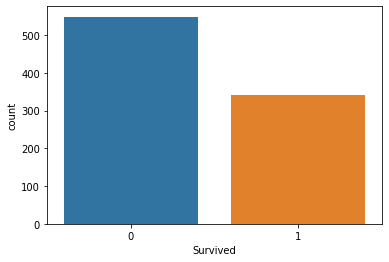

In [88]:
#Univariate Analysis

#Let's start with Survived Column

sns.countplot(x='Survived', data=df)
#We will have total 891 columns, Now , we will find percentages of passengers who survived and who did not
death_percent=round((df['Survived'].value_counts().values[0]/891)*100)
print("Out of 891 ,{} percent of people died in the accident" .format(death_percent))

#Conclusion: It was a fatal accident and more people died than survived.

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


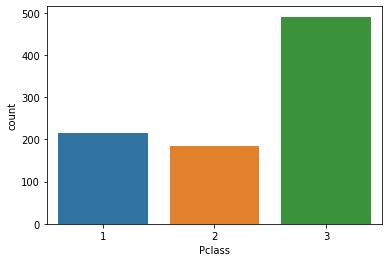

In [ ]:
#Pclass 

print((df['Pclass'].value_counts()/891)*100)

sns.countplot(x='Pclass', data=df)

#Conclusion :There is not much of a difference in fares between 1st and 2nd class. A lot of people were travellig in 3rd class

male      64.758698
female    35.241302
Name: Sex, dtype: float64


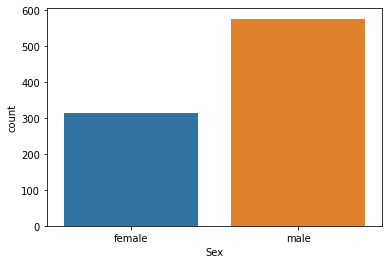

In [ ]:
#Checking Gender column

print((df['Sex'].value_counts()/891)*100)
sns.countplot(x='Sex',data=df)

#Conclusion :A whopping 65 percent passengers were male

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


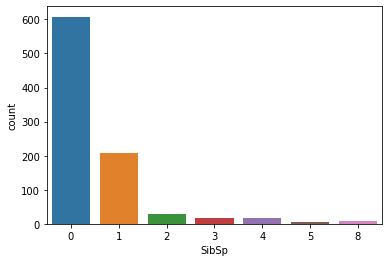

In [ ]:
#Checking SibSp Column
print((df['SibSp'].value_counts()/891)*100)
sns.countplot(x='SibSp', data=df)

#Conclsuion: Most of the passegers were travelling with either 0 or 1 sibling.

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


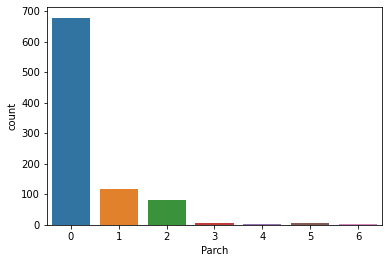

In [ ]:
#Checking Parch Column
print((df['Parch'].value_counts()/891)*100)

sns.countplot(x='Parch', data=df)

#Conclusion:
#Most of the passengers were travelling with alone or with a child.


S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


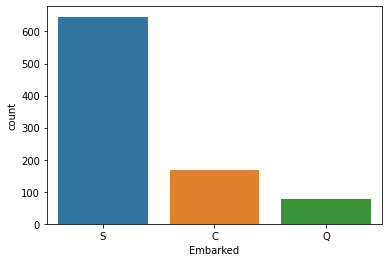

In [ ]:
#Checking Embarked Column
print((df['Embarked'].value_counts()/891)*100)

sns.countplot(x='Embarked', data=df)

#Conclusion :
#A whopping 73% people were going to city 'S'.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.45956263424701577
0.9865867453652877


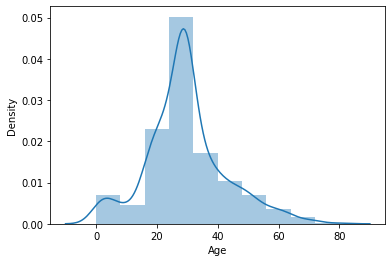

In [ ]:
#It's time to dig into Numerical Columns

sns.distplot(df['Age'], bins=10)
print(df['Age'].skew() )
print(df['Age'].kurt() )

#Conclusion :
#The data for Age is closer to a normal distribuion
#Skew and kurtosis is within accepable range
#Most of the passengers were between the age 20 and 40.

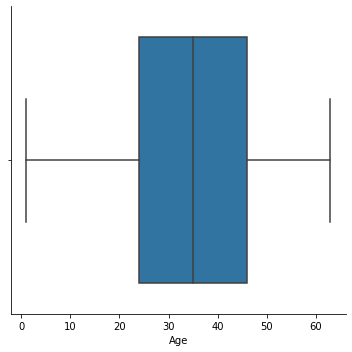

In [149]:
sns.catplot(x='Age',kind='box', data=df)

#Conclusion : Passengers around the age of 0 and more tha 55 are considered outliers.

In [ ]:
#To take the analysis forward, we will find out number of passengers within a age bracket.
print("People with age between 55 and 65 are", df[(df['Age']>55) & (df['Age']<65)].shape[0])

print("People with age above 65 and 75 are", df[(df['Age']>65) & (df['Age']<75)].shape[0])

print("People with age greater than ", df[(df['Age']>75) ].shape[0])

print("\n---------------------\n")


print("People with age betwwen 0 and 1 ", df[(df['Age']<1) ].shape[0])

#Conclusion :
#1.There are 28 people between the age of 55 and 68. Hence, we cannot considered them as an outlier.
#2.There are less than 7 students with other Age brackets.Hence, we can't consider them as an Outlier.

People with age between 55 and 65 are 29
People with age above 65 and 75 are 7
People with age greater than  1

---------------------

People with age betwwen 0 and 1  7


4.787316519674893
33.39814088089868

 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


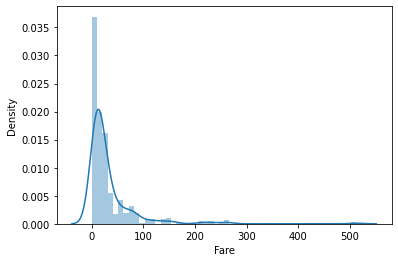

In [ ]:
#Checking Fare Column

print(df['Fare'].skew() )
print(df['Fare'].kurt() )

print("\n \n")
sns.distplot(df['Fare'])
plt.show()

#Conclusion :
#Fare is right skewed because most passensgers bought tickets from 3rd Class.


In [148]:
#Checking fare for number of passengers right from $200

print("People with Fare between $200 and $300 are", df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print("People with Fare greater than $300 are", df[(df['Fare']>300)].shape[0])


People with Fare between $200 and $300 are 9
People with Fare greater than $300 are 0


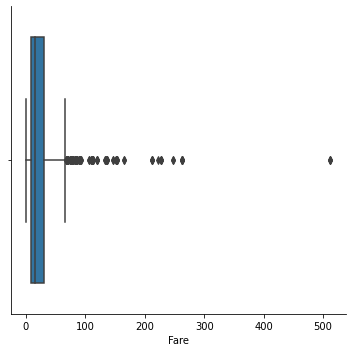

In [ ]:
sns.catplot(x='Fare',kind='box', data=df)

#Conclusion

#Same conclusion can be made from Boxplot as well. There are very few people who bought tickets charging more than $200


Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


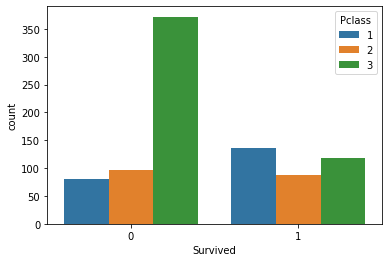

In [ ]:
#Multivariate Analysis

#Checing Survival with rspect to PClass

sns.countplot(x='Survived', hue='Pclass', data=df)

pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


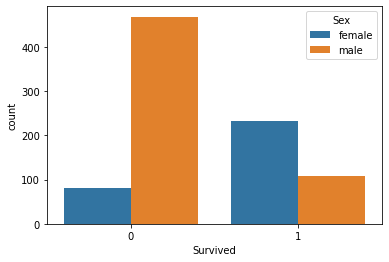

In [94]:
#Checking Survival with respect to Sex
sns.countplot(x='Survived', hue='Sex', data=df)

pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


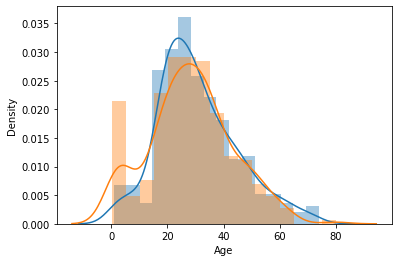

In [93]:
#Checking Survival with respect to Age
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

#Conclusion:
#1.Passengers from the age of 15 to 20 had a higher probability of dying than surviving.
#2.Passengers from the age of 35 to 40 had a higher probability of surviving than  dying.
#3.Passengers from the age of 65 above had a higher probability of dying than surviving.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


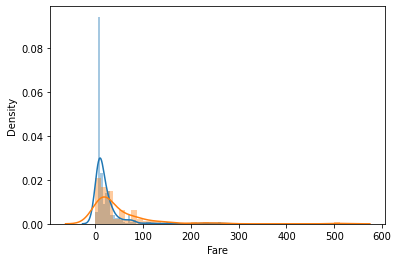

In [ ]:
#Checking Survival with respect to Fare
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

#Conclusion:
#1.Passengers with lower fares had a higher probability of dying than surviving.
#2. As the fare increases, the probability of surviving increases commensurately. 

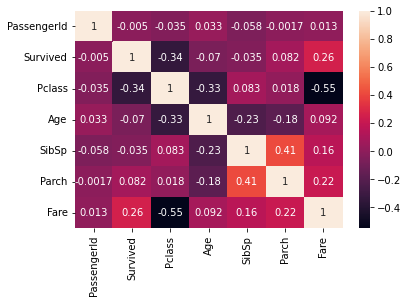

In [ ]:
#Checking relationship between Columns

#We will use this matrix to asceratain dependency between multiple variables

corelation =df.corr()
sns.heatmap(corelation, annot=True)

#Conclusion : There is a high corelation between Fare and Survived column.


In [95]:
#We will combine Parch and SibSp column into one single column called 'Family Size'.

df['Family_Size']=df['Parch'] + df['SibSp']

In [96]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1


In [125]:
df['Family_Size']=df['Family_Size'].astype('int')


In [129]:
#Now, We will divide Family size into 3 categories fo further analysis

def Family_Type(Size):
  if Size==0:
     return "Alone"
  elif Size>0 and Size <=4 :
     return "Medium"
  else :
     return "Large"

df['Family_Type']=(df['Family_Size'].apply(Family_Type))



In [130]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_Size,Family,Family_Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,S,1,Medium,Medium


In [133]:
#Dropping SibSp and Parch Column

df.drop(columns=['Parch', 'SibSp', Family_Size'],inplace=True)



In [136]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.25,S,Medium


Survived,0,1
Family_Type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


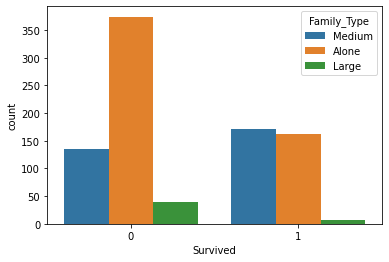

In [138]:
#Checking Survival with respect to Family Type
sns.countplot(x='Survived', hue='Family_Type', data=df)

pd.crosstab(df['Family_Type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

#Conclusion:
#1.The probability of passenger travelling was more than passengers travelling with a companion
#2.Having said that, if Passenger were travelling wit more than 4 family members, the chances of them dying is infinity more than passengers travelling alone of with less than 4 family members.
#3.Passengers travelling with less than 4 family members had highest probability of surviving.

In [ ]:
#It's time to detect Outliers
#We have Outliers in Numerical data

#Numerical Data
#Method 1.If data follows normal distribution, anyhting beyond +3SD and -3SD away from the mean is considered as an Outlier.
#Method 2.If data does not follow normal distribution, by sng boxplot we can eliminate Outliers beyond Q1-1.5 IQR and Q3 + 1.5 IQR




In [140]:
#Eliminating Outliers in Age Column by using 1st methoed as data follows Normal Distribution

df=df[df['Age']<(df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(712, 10)

In [150]:
#Eliminating Outliers from Fare Column by suing second method as data does not follow Normal Distribution

Q1=np.percentile(df['Fare'],25)
Q3=np.percentile(df['Fare'],75)


Outlier_low= Q1-1.5 * (Q3-Q1)
Outlier_high= Q3 +1.5 * (Q3-Q1)

df=df[(df['Fare']>Outlier_low) & (df['Fare']<Outlier_high)]